## Importing Modules

In [1699]:
# Typical Data Science Stuff
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


# Model Classifiers and related
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignore Warnings
import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

## Import the Data

In [1700]:
# Read in given datasets files
df = pd.read_csv("Hotel Reservations.csv", sep=",")    

## Data Info

In [1701]:
# Check datasets' sample size
df.shape

(36275, 19)

Before cleaning, we have a total of 19 features. 36275 row of the hotel reservations data

In [1702]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [1703]:
# Check original data types for each column in the data set
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [1704]:
# Show the number of numerical columns in the dataframe
df.select_dtypes(include=np.number).shape[1]

14

In [1705]:
# Show the number of non-numerical columns in the dataframe
df.select_dtypes(exclude=np.number).shape[1]

5

## Data Cleaning and Preprocessing

### 1）Dealing with Missing Values

In [1706]:
# Check the number of rows containing empty values
null_sum = df.isnull().sum()
null_sum

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There is no missing value in each row.

### 2）Dealing with Duplicated Rows

In [1707]:
# Checking the duplicated rows
df.duplicated().sum()

0

There is no duplicated rows

### 3）Dropping the ID Column

Since ID is unque for each customer so it will be useless as it cannot represent a class of samples.

In [1708]:
# Drop the Booking_ID column.
df = df.drop('Booking_ID', axis = 1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### 4）Converting Column Data Types

In [1709]:
# Convert columns containing categorical data to correct categorical data types
cat_col = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
df_cat = df[cat_col].astype('category')
df_cat

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


In [1710]:
# Check if all categorical columns are converted
df_cat.dtypes

type_of_meal_plan      category
room_type_reserved     category
market_segment_type    category
booking_status         category
dtype: object

### 5）Checking distribution of values in each Categorical Columns  

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


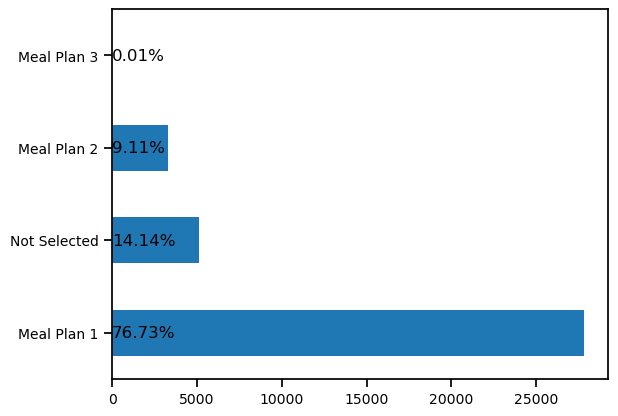

In [1711]:
# Check the number of each items in type_of_meal_plan columns
print(df_cat['type_of_meal_plan'].value_counts())

# Use horizontal bar chart to show type_of_meal_plan 
for i, v in enumerate(df_cat['type_of_meal_plan'].value_counts(normalize=True)):
    df_cat['type_of_meal_plan'].value_counts().plot.barh(fontsize=10).annotate(f"{v*100:.2f}%", xy=(v, i), va='center')    
plt.show()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


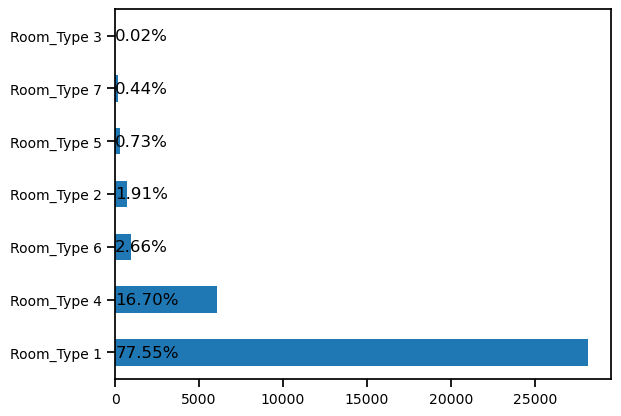

In [1712]:
# Check the number of each items in room_type_reserved
print(df_cat['room_type_reserved'].value_counts())

# Use horizontal bar chart to show room_type_reserved
for i, v in enumerate(df_cat['room_type_reserved'].value_counts(normalize=True)):
    df_cat['room_type_reserved'].value_counts().plot.barh(fontsize=10).annotate(f"{v*100:.2f}%", xy=(v, i), va='center')    
plt.show()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


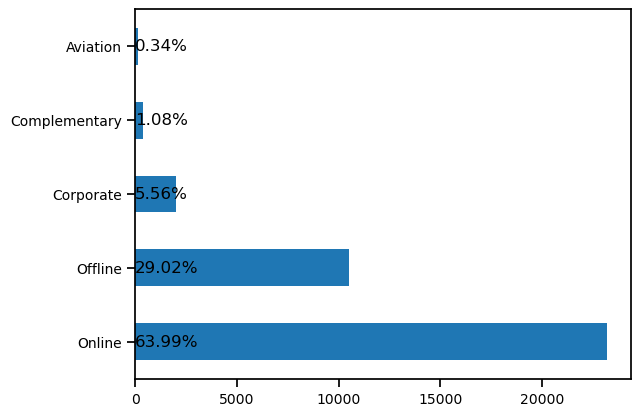

In [1713]:
# Check the number of each items in market_segment_type
print(df_cat['market_segment_type'].value_counts())

# Use horizontal bar chart to show market_segment_type
for i, v in enumerate(df_cat['market_segment_type'].value_counts(normalize=True)):
    df_cat['market_segment_type'].value_counts().plot.barh(fontsize=10).annotate(f"{v*100:.2f}%", xy=(v, i), va='center')    
plt.show()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


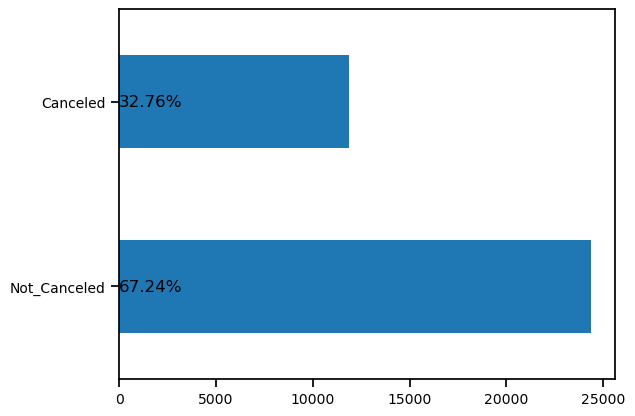

In [1714]:
# Check the number of each items in booking_status
print(df_cat['booking_status'].value_counts())

# Use horizontal bar chart to show booking_status
for i, v in enumerate(df_cat['booking_status'].value_counts(normalize=True)):
    df_cat['booking_status'].value_counts().plot.barh(fontsize=10).annotate(f"{v*100:.2f}%", xy=(v, i), va='center')    
plt.show()

In summary, we can see that none of the categorical columns have outliers. Looking at categorical variables, we can see that most reservations select meal_plan_1, the most booked room types are types 1 and 4, and most people booked rooms online.

### 6）Featuring Engineering for Categorical Data

In [1715]:
# one-hot encoding
df_fe = pd.get_dummies(df.iloc[:,1:-1])
df_fe['label'] = df['booking_status']
df_fe['label'] = df_fe['label'].map({'Not_Canceled':0,'Canceled':1})

In [1716]:
df_fe


,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,label
0,0,1,2,0,224,2017,10,2,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,3,0,5,2018,11,6,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1,0,1,2018,2,28,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,2,0,211,2018,5,20,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,1,0,48,2018,4,11,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,2,6,0,85,2018,8,3,0,0,...,1,0,0,0,0,0,0,0,1,0
36271,0,1,3,0,228,2018,10,17,0,0,...,0,0,0,0,0,0,0,0,1,1
36272,0,2,6,0,148,2018,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0
36273,0,0,3,0,63,2018,4,21,0,0,...,0,0,0,0,0,0,0,0,1,1


### 7）Processing Numerical Data

In [1717]:
# Have all columns containing numerical data
num_col = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year',
           'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
           'no_of_special_requests']
df[num_col]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0


In [1718]:
# Check the cloumns types
df[num_col].dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

### 8）Checking distribution of values in each Numerical Columns  

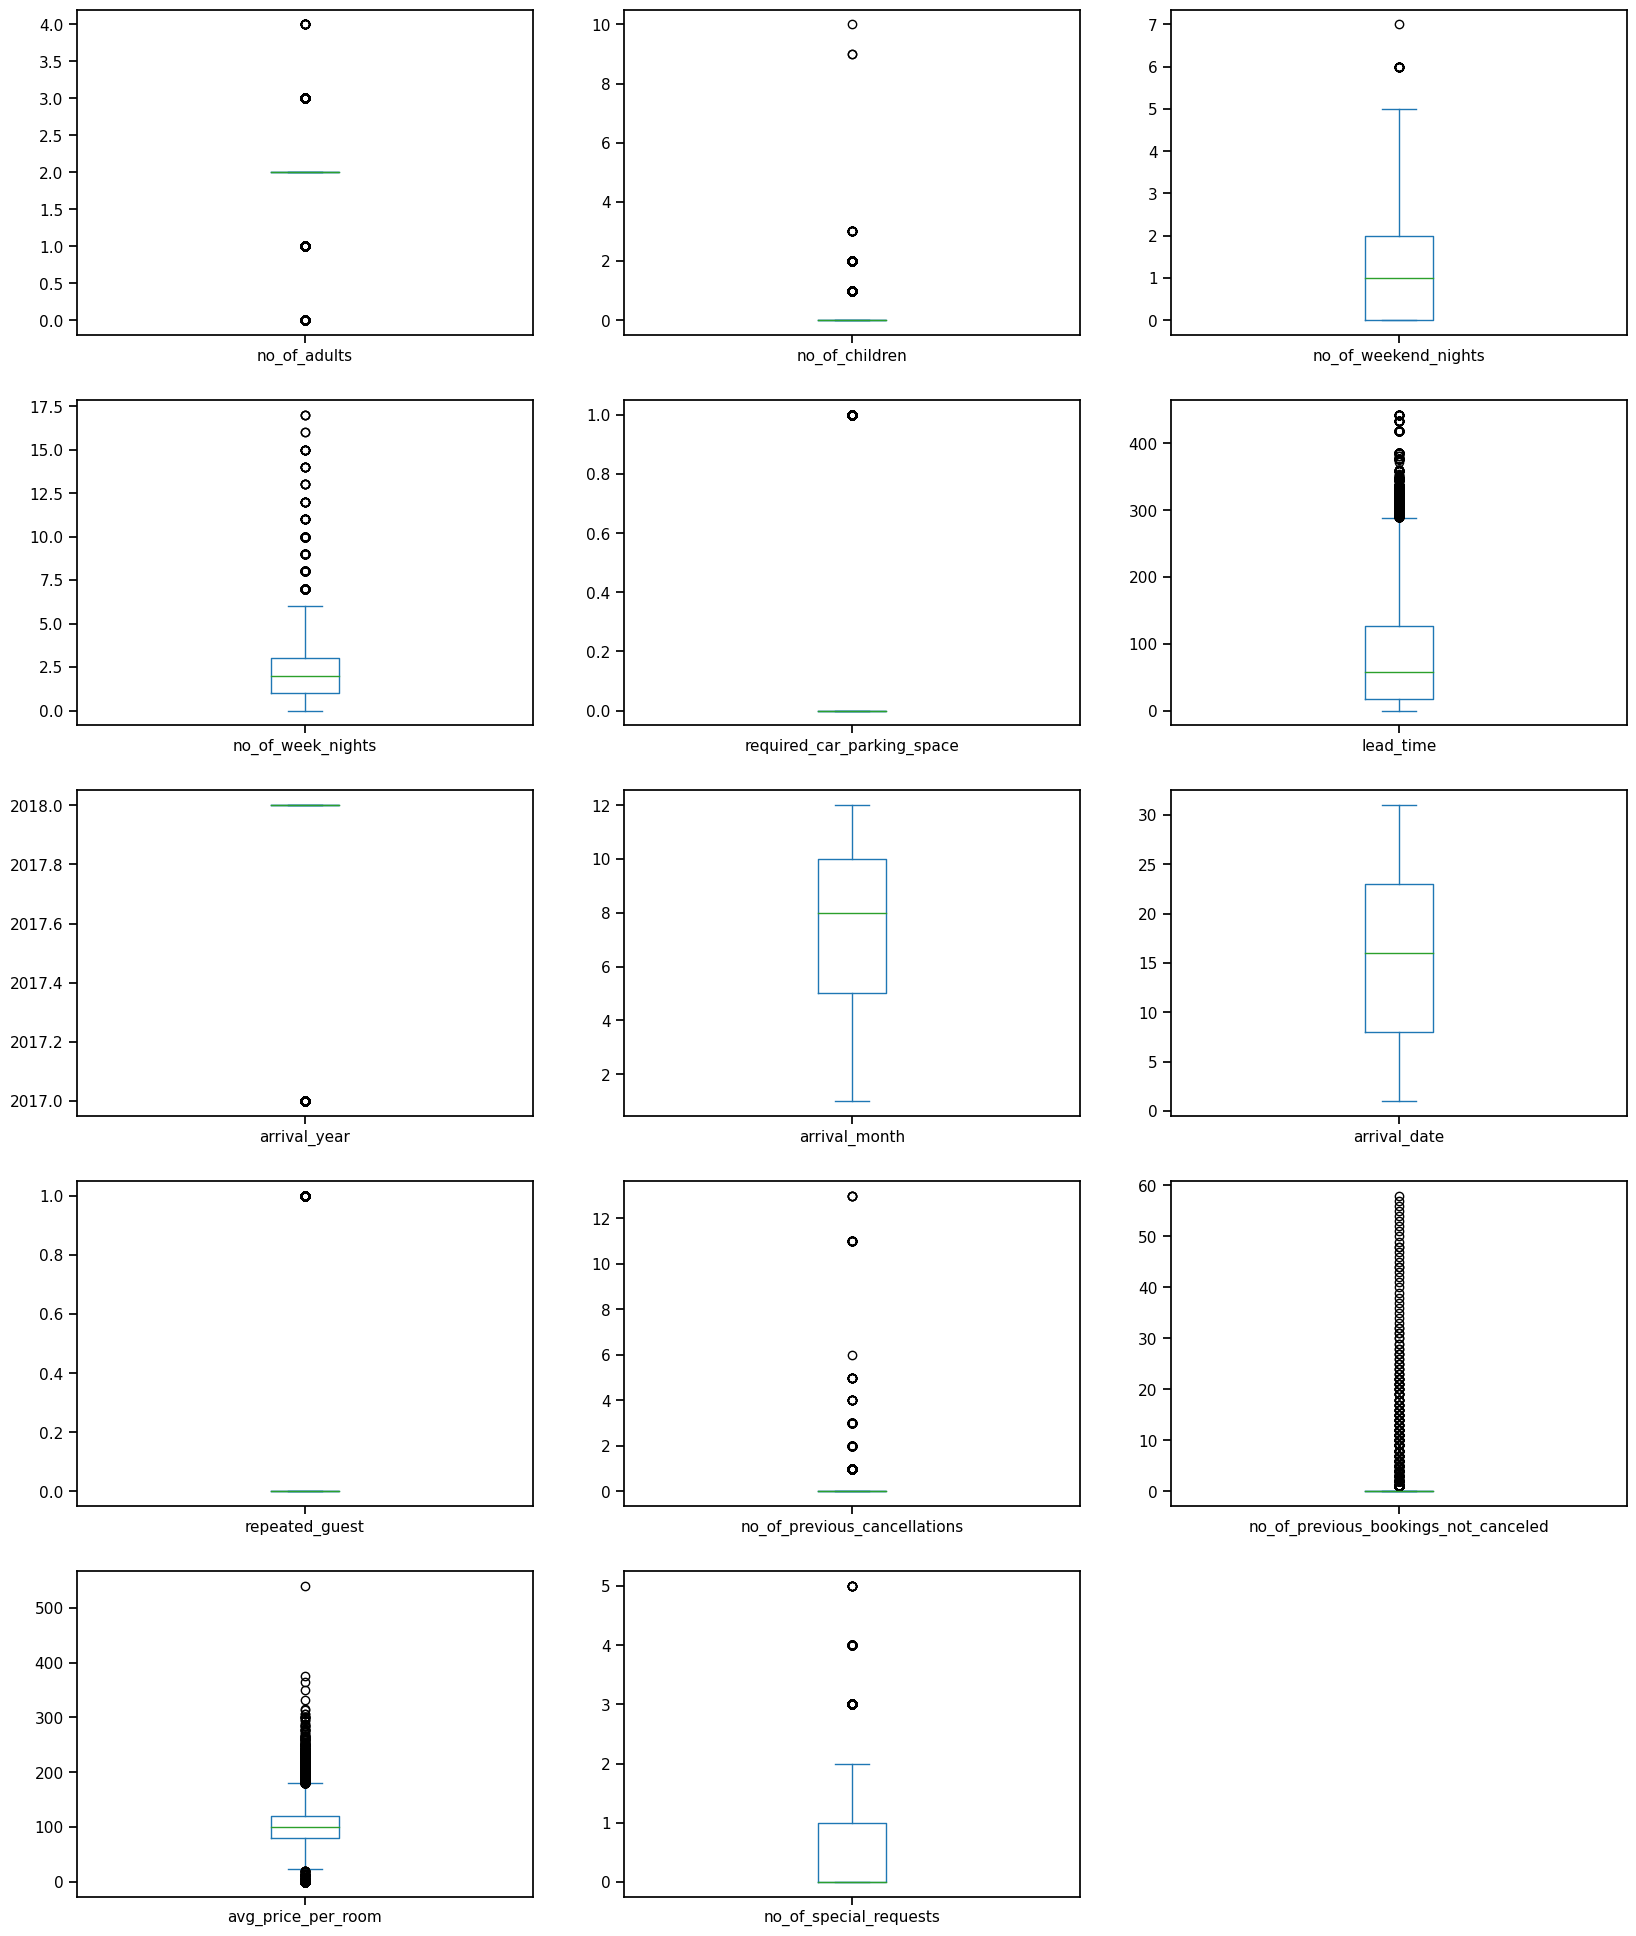

In [1719]:
# Show horizontal box plots of each numerical columns. 
df[num_col].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

When checking the Boxplots, we can see that there are some outliers but that did not influence the creation of the model, so I will not deal with that. Looking at variables, we can see that most reservations are made for rooms with two adults and without children, generally, reservations are short-term, not many cases are long-term, most reservations do no need a car space, and most of our data is from 2018 bookings.

## Data Exploration

### 1）Exploring Variables between each others

In [1720]:
# Create a sunburst chart to visualize the distribution of booking_status and required_car_parking_space in the data set. 
# and see the relative frequency of different categories in a hierarchical manner.
freq = df.groupby(['required_car_parking_space','booking_status']).size().reset_index()
freq.rename({0:'count'},axis=1,inplace=True)
fig = px.sunburst(freq, path=['booking_status','required_car_parking_space'],
                  values='count',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='label+value+percent parent')
fig.show()

Based on above, we can see different required_car_parking_space doesn't make much difference to booking_status. But generally guests who request a parking space, who generally do not cancel the reservation.

In [1721]:
# Create a sunburst chart to visualize the distribution of repeated_guest and required_car_parking_space in the data set. 
# and see the relative frequency of different categories in a hierarchical manner.
freq = df.groupby(['repeated_guest','booking_status']).size().reset_index()
freq.rename({0:'count'},axis=1,inplace=True)
fig = px.sunburst(freq, path=['booking_status','repeated_guest'],
                  values='count',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='label+value+percent parent')
fig.show()

Based on above, we can find out the repeated_guest is only accounted for 4 percent of Not_canceled

In [1722]:
# Creat catplots and check the influence of different categories on booking_status is observed in terms of quantity and frequency respectively
def catplot(data,x,y):
    sns.set_context('notebook')
    order=['Canceled','Not_Canceled']
    with sns.axes_style("darkgrid"):
        fig,ax=plt.subplots(1,2,figsize=[12,5])
        sns.histplot(data=data,y=x,hue=y,multiple='stack',palette='CMRmap',alpha=0.5,ax=ax[0],hue_order=order)
        sns.histplot(data=data,y=x,hue=y,stat='probability',multiple='fill',palette='CMRmap',alpha=0.5,hue_order=order)
        plt.tight_layout()
        plt.show()

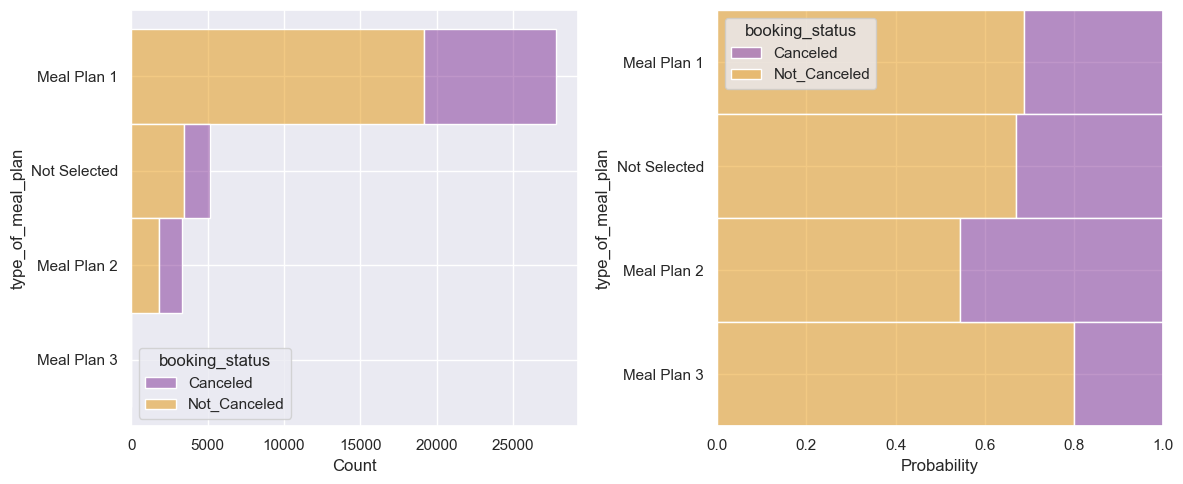

In [1723]:
# type_of_meal_plan VS booking_status
catplot(data=df,x='type_of_meal_plan',y='booking_status')

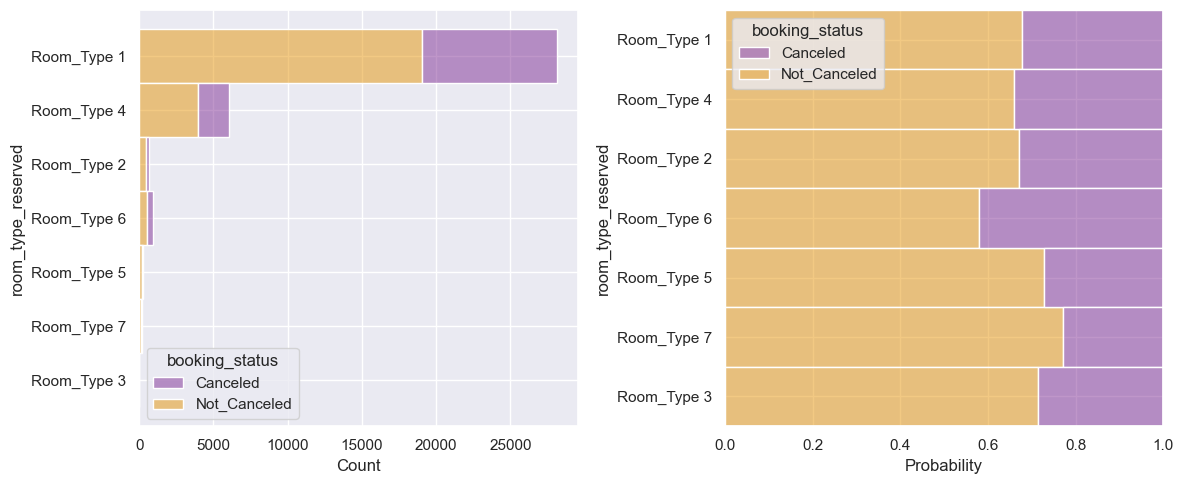

In [1724]:
# room_type_reserved VS booking_status
catplot(data=df,x='room_type_reserved',y='booking_status')

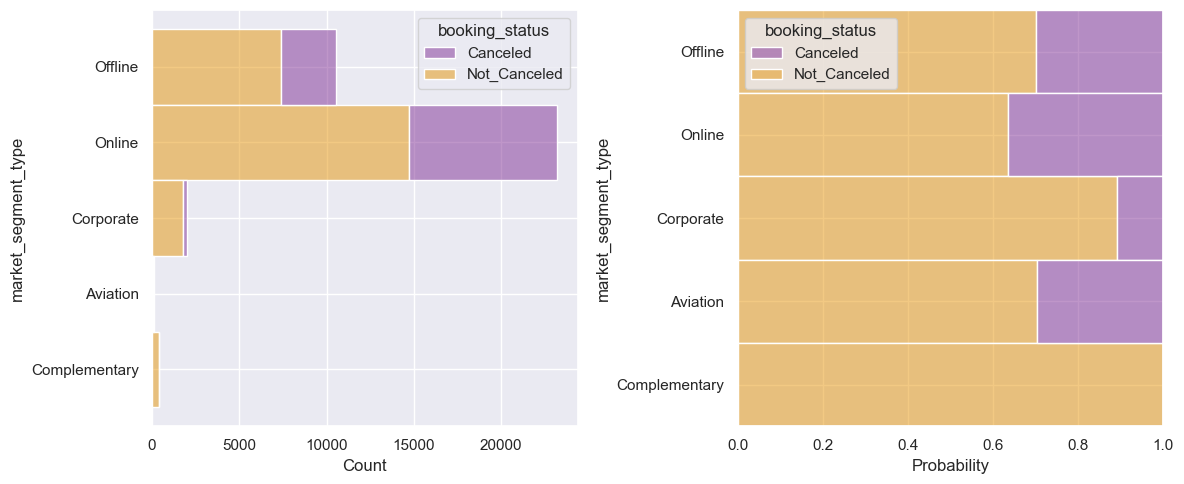

In [1725]:
# market_segment_type VS booking_status
catplot(data=df,x='market_segment_type',y='booking_status')

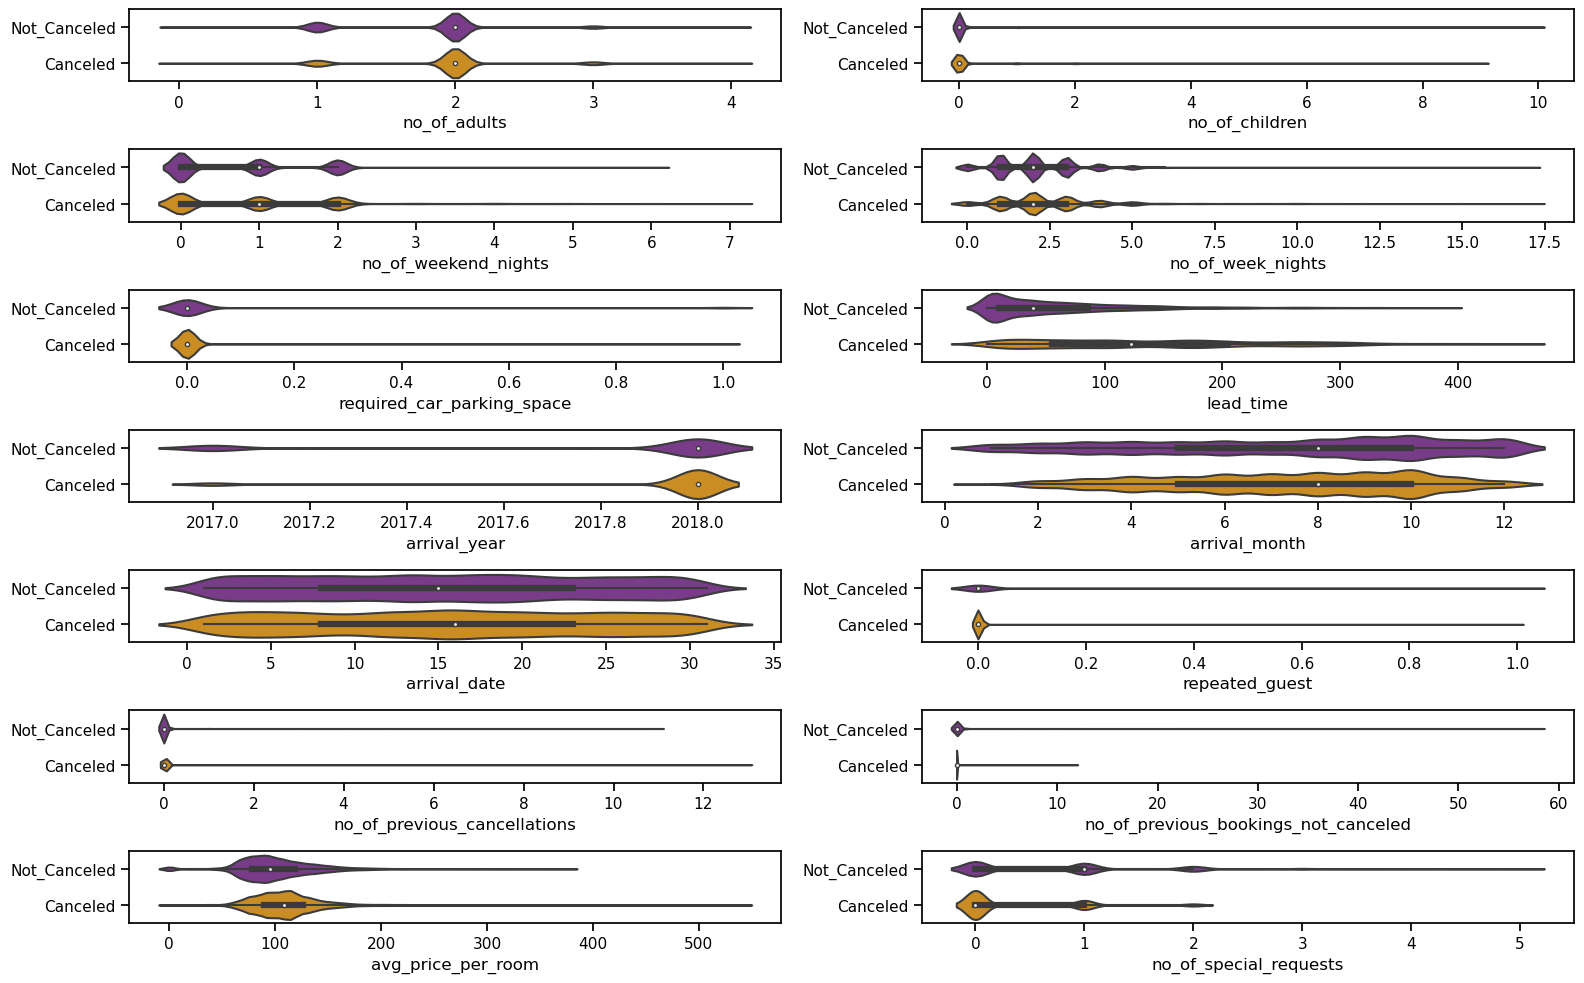

In [1726]:
# Creat violin plots to show the distribution of each numerical feature within each booking status, and to see any differences or similarities in the 
# distribution across.
fig,ax = plt.subplots(7,2,figsize=[16,10])
for idx,ax in enumerate(ax.flat):
    sns.violinplot(data=df,y='booking_status',x=df[num_col].columns[idx],ax=ax,palette='CMRmap')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

In summary, we can see lead_time has the biggest difference in booking_status，and as the lead time increases the possibility of canceling increases. Besides, we can see guests who have stayed previously are guests who generally do not cancel the reservation, and guests who request special requests are guests less likely to cancel. The more requests, the less probably. Another interesting view is that we usually have fewer cancellations in the final three months of the year. Also, we can see that more expensive rooms may also experience more cancellations.

### 2）Heat Map 

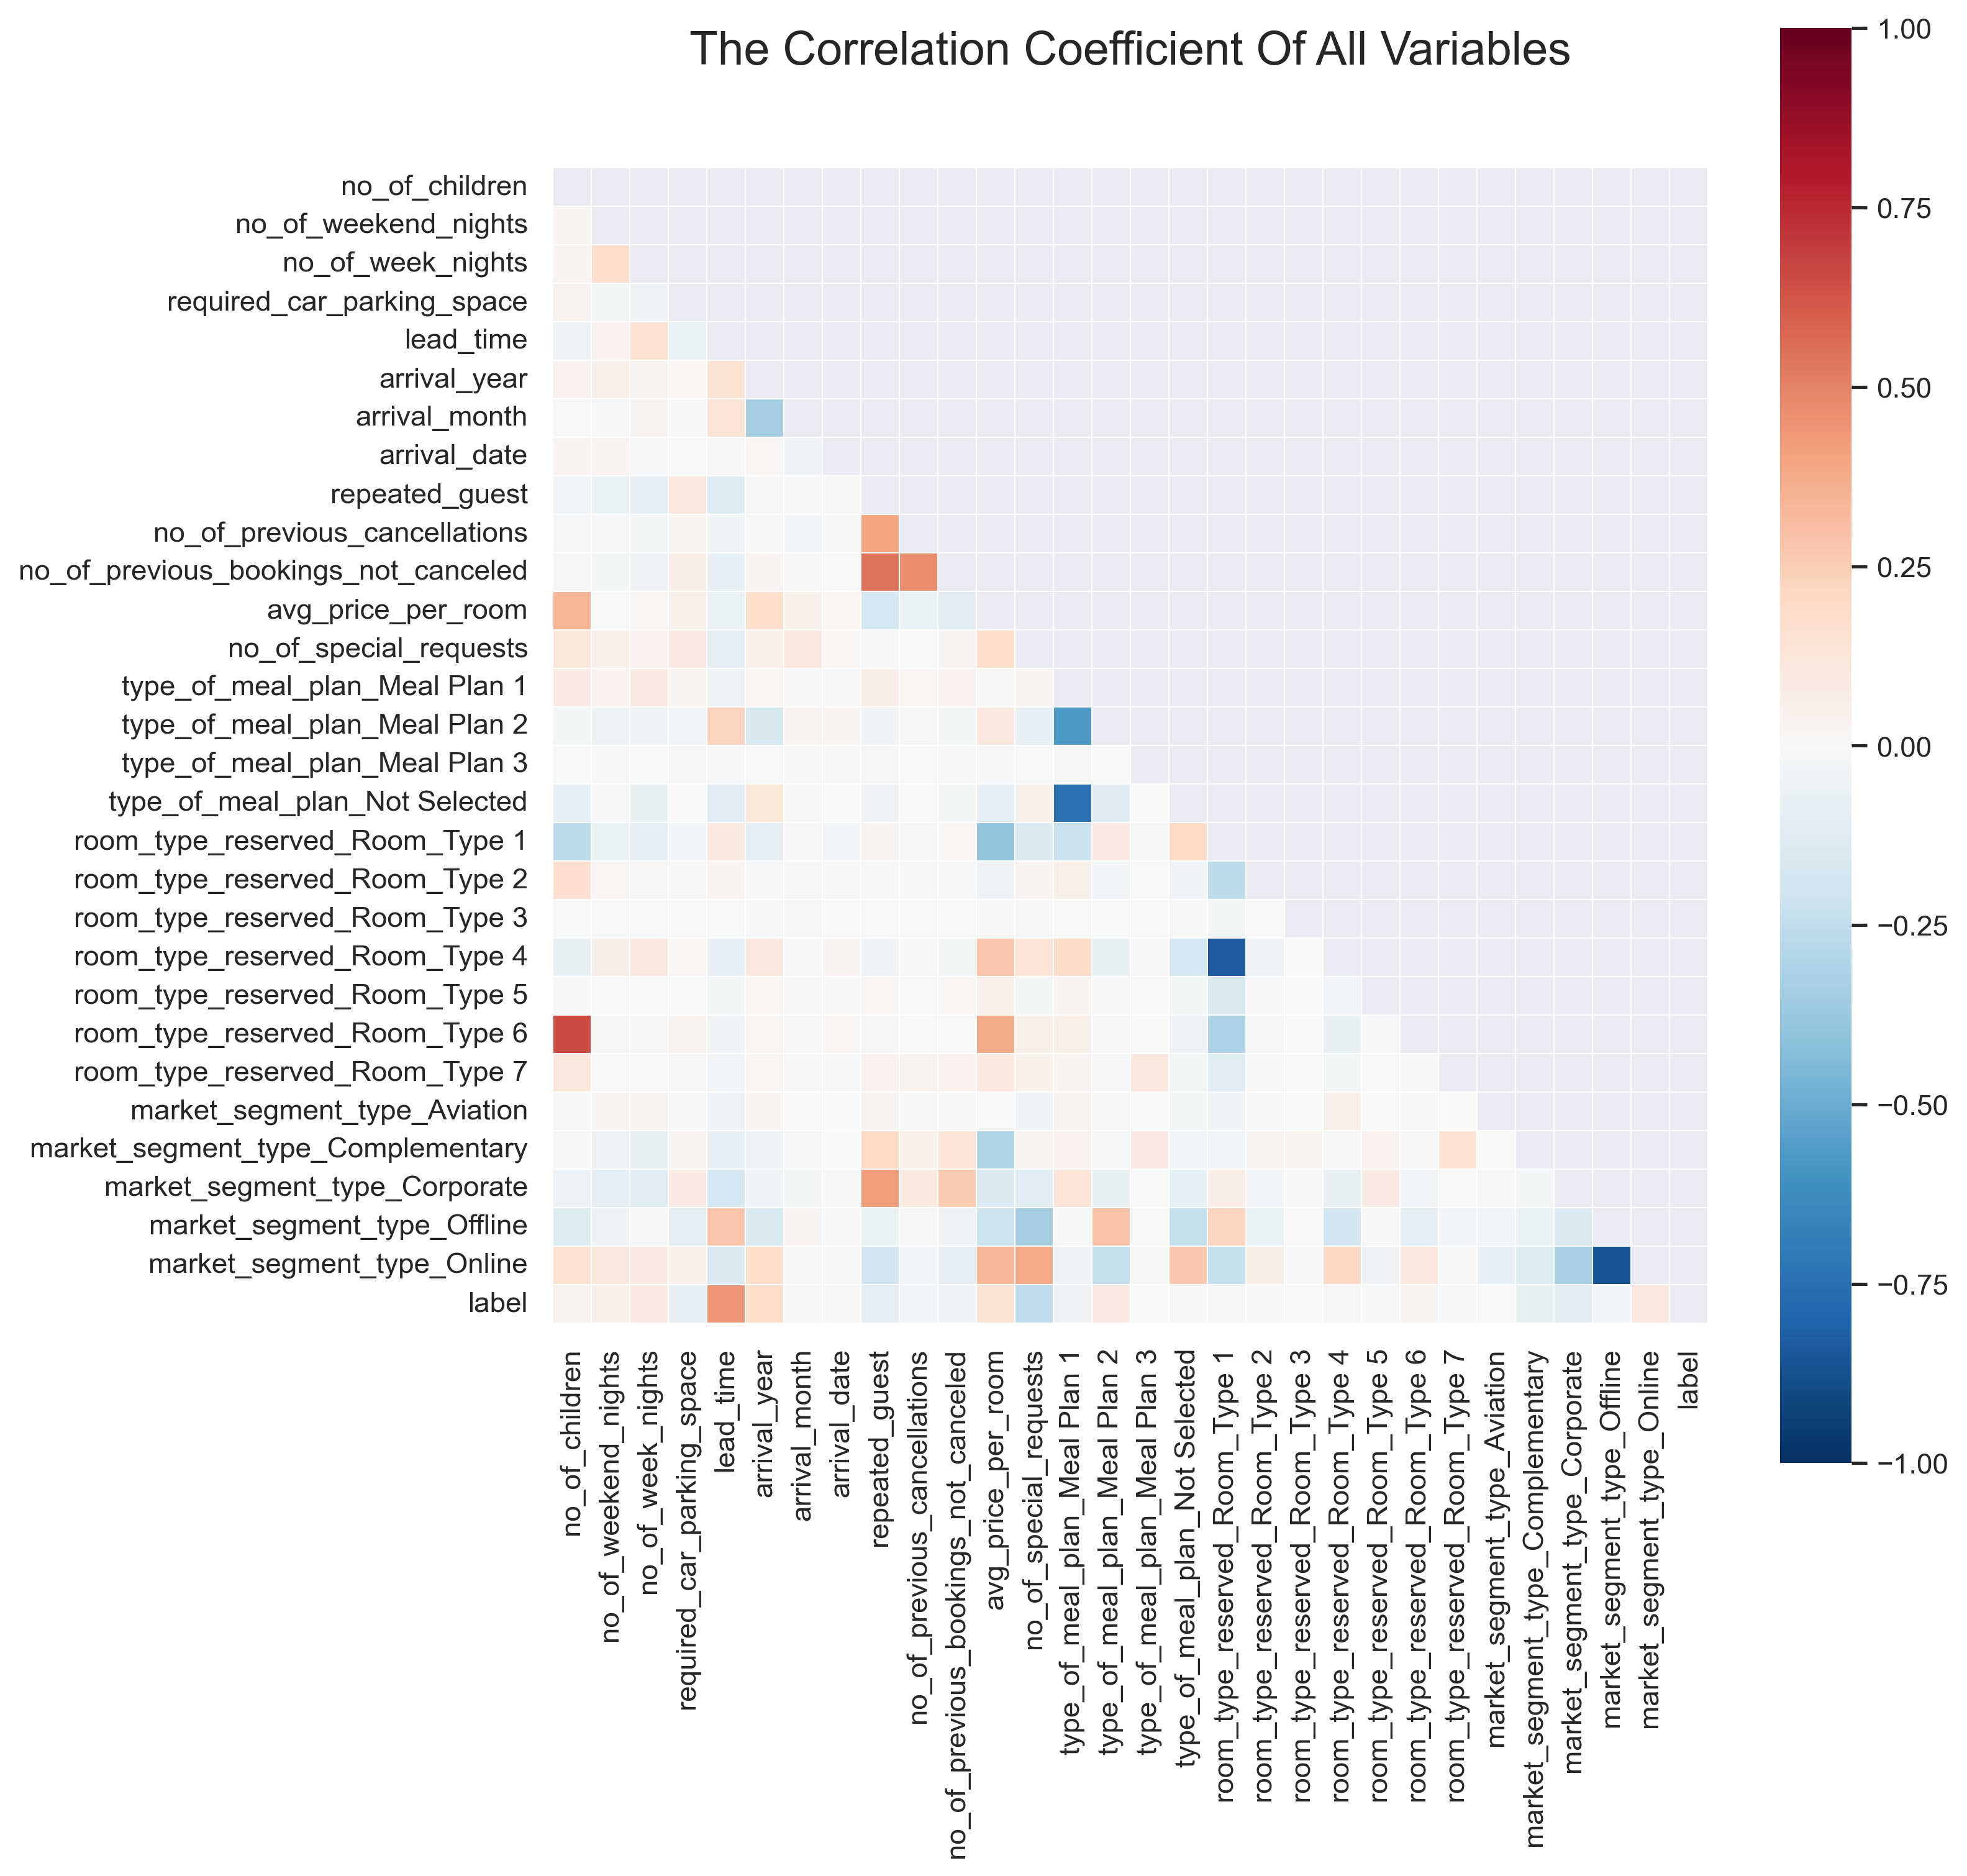

In [1727]:
# A mutual correlation between variables that might be useful
corr = df_fe.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('darkgrid'):
    fig,ax=plt.subplots(figsize=[10,10],dpi=300)
    sns.heatmap(corr,vmax=1,vmin=-1,fmt='.3f',
                cmap='RdBu_r',xticklabels=corr.index,yticklabels=corr.index,
                mask=mask,linecolor='white',linewidth=0.001,square=True)
    ax.set_title('The Correlation Coefficient Of All Variables',pad=40,fontsize=18)
    plt.show()

### 2）Correlations

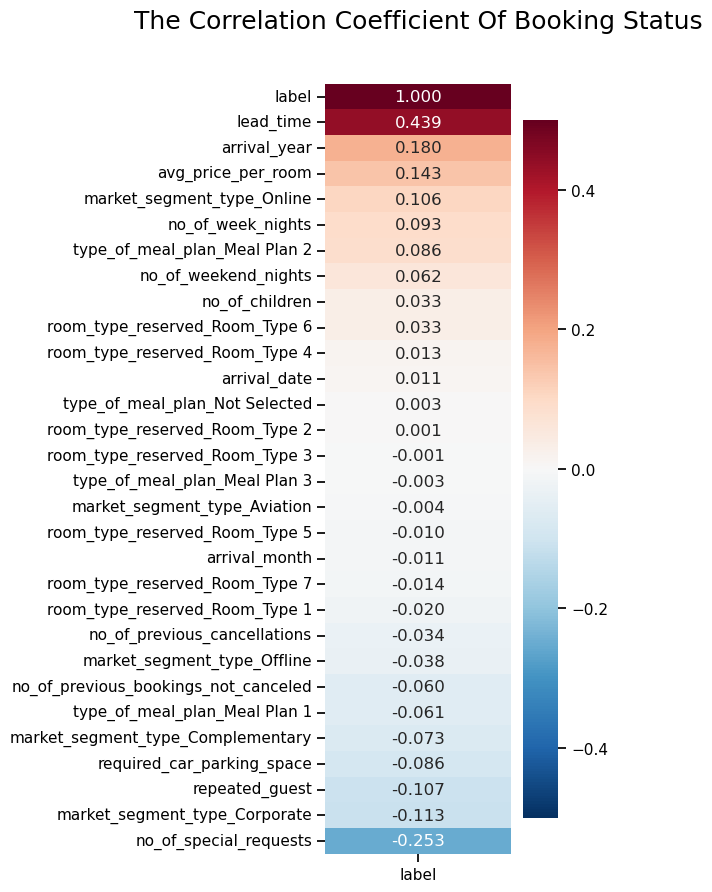

In [1728]:
# Calculate the correlation coefficients for all variables and labels
corr = corr[['label']].sort_values('label',ascending=False)
fig,ax=plt.subplots(figsize=[3,10])
sns.heatmap(corr,annot=True,vmax=0.5,vmin=-0.5,fmt='.3f',cmap='RdBu_r')
ax.set_title('The Correlation Coefficient Of Booking Status',pad=40,fontsize=18)
plt.show()

From above, we can see the Lead_Time variable have the most correlation with the target value. And also, we can see the linear correlation is so weak, so I assume that it is unnecessary to consider the linear model of logistics and SVM, so there is no need to normalize the data.  

In [1729]:
# Make train/test sets
y = df_fe.pop('label')
x = df_fe
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

## Models

In [1730]:
# Evaluate the performance of a machine learning model, visualizing both the ROC curve and confusion matrix.
def evaluate(model,x,y):
    fig,ax=plt.subplots(1,2,figsize=[15,5])
    metrics.RocCurveDisplay.from_estimator(model,x,y,ax=ax[0])
    metrics.ConfusionMatrixDisplay.from_estimator(model,x,y,ax=ax[1])
    print(metrics.classification_report(y,model.predict(x)))

### 1）Logistic Regression

- Default Parameters

In [1731]:
Lr = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression()),
])

In [1732]:
Lr.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4878
           1       0.73      0.63      0.68      2377

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



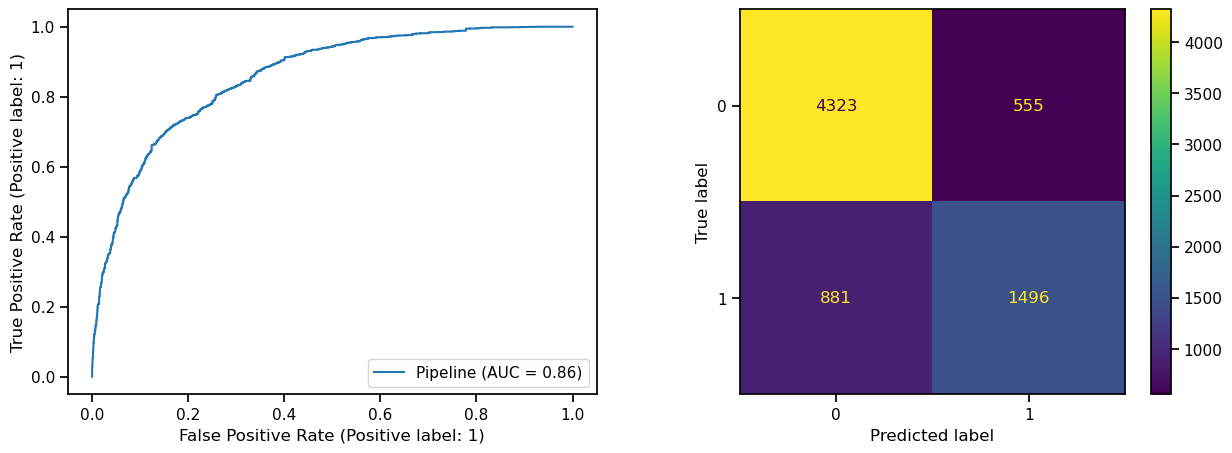

In [1733]:
evaluate(Lr,X_test,y_test)

- Parameters Search

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4878
           1       0.73      0.63      0.67      2377

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



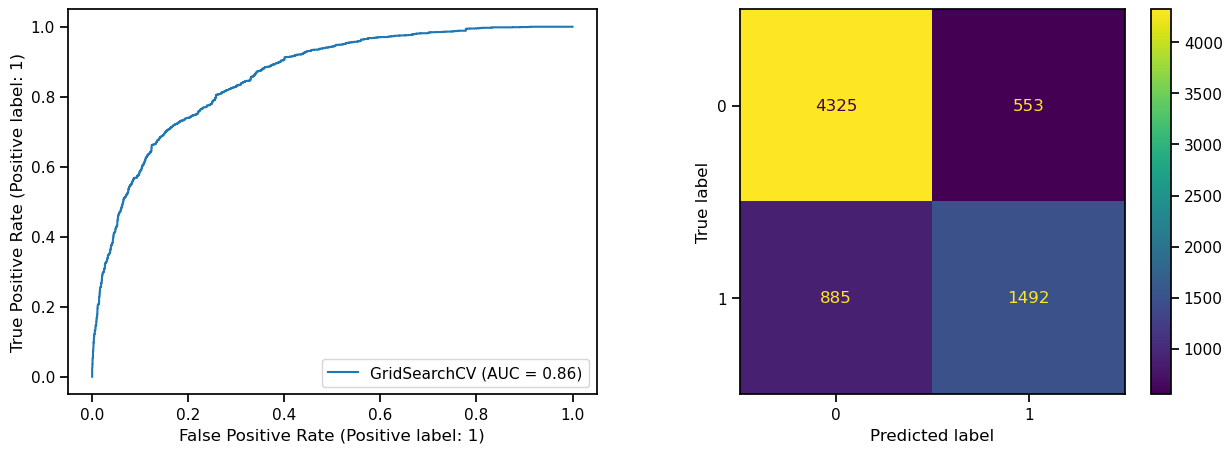

In [1734]:
# Automate way to search for the best hyperparameters
Lr_gs = GridSearchCV(Lr,param_grid={'clf__C':np.arange(0.1,1,11)})
Lr_gs.fit(X_train,y_train)
evaluate(Lr_gs,X_test,y_test)

After comparison, there is no change before and after

### 2）KNeighbors

- Default Parameters

In [1735]:
Knn = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

In [1736]:
Knn.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4878
           1       0.78      0.75      0.77      2377

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



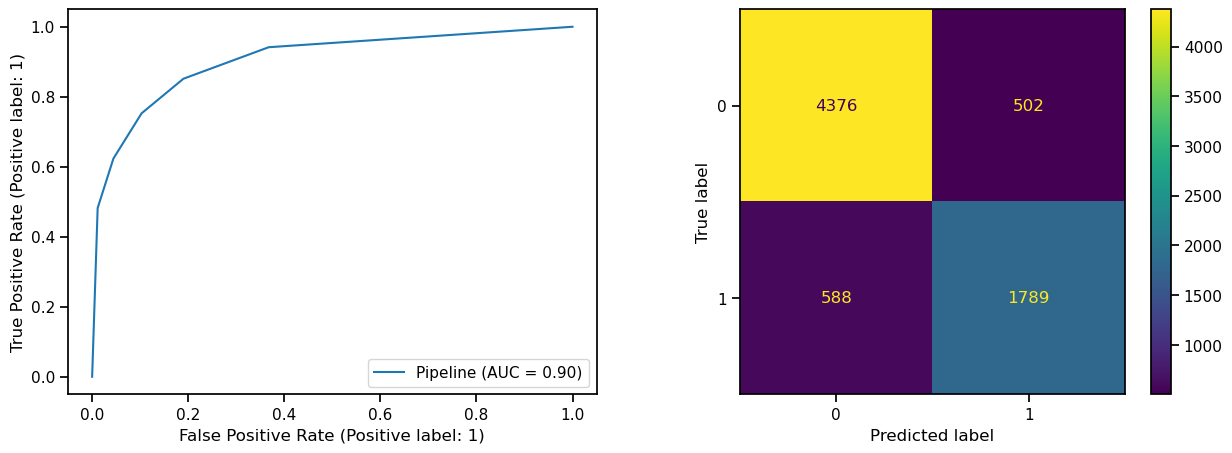

In [1737]:
evaluate(Knn,X_test,y_test)

- Parameters Search

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4878
           1       0.82      0.70      0.76      2377

    accuracy                           0.85      7255
   macro avg       0.84      0.81      0.83      7255
weighted avg       0.85      0.85      0.85      7255



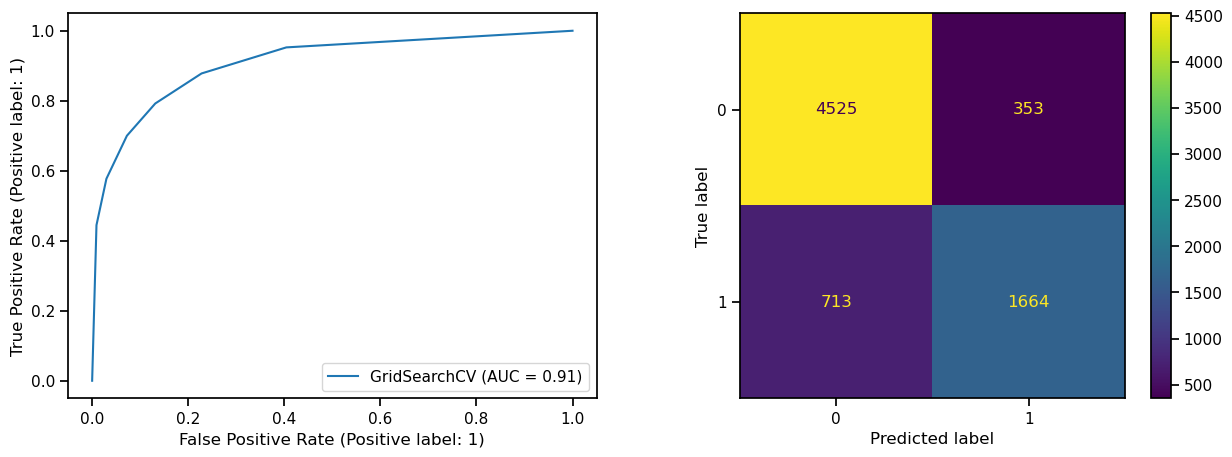

In [1738]:
# Automate way to search for the best hyperparameters
Knn_gs=GridSearchCV(Knn,param_grid={'clf__n_neighbors':np.arange(2,11,2)})
Knn_gs.fit(X_train,y_train)
evaluate(Knn_gs,X_test,y_test)

From the graphs, we can see this model is getting better at 0 and getting worse at 1. Overall, there is no significant change in auc acc.

### 3）Decision Tree

- Default Parameters

In [1739]:
Dt = DecisionTreeClassifier().fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4878
           1       0.80      0.80      0.80      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



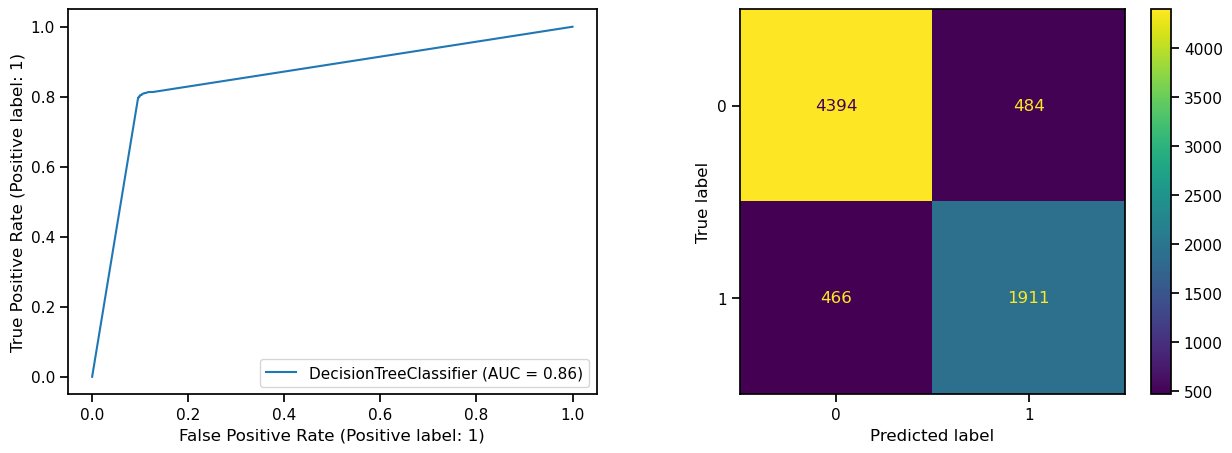

In [1740]:
evaluate(Dt,X_test,y_test)

- Parameters Search

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4878
           1       0.83      0.78      0.80      2377

    accuracy                           0.88      7255
   macro avg       0.86      0.85      0.86      7255
weighted avg       0.87      0.88      0.87      7255



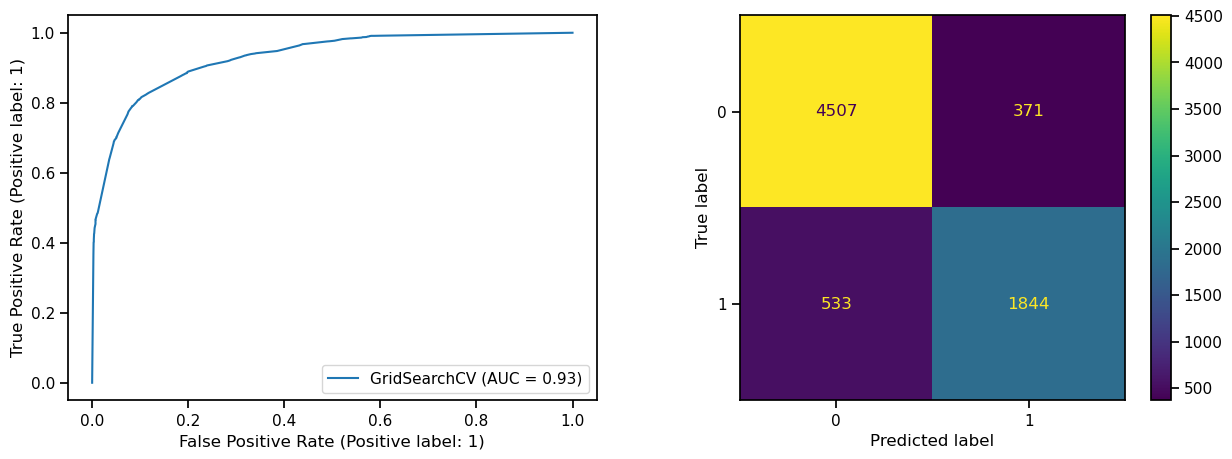

In [1758]:
# Automate way to search for the best hyperparameters
Dt_gs=GridSearchCV(DecisionTreeClassifier(),param_grid={'max_depth':np.arange(2,11,2),
                                                          'max_features':np.arange(5,30,5)})
Dt_gs.fit(X_train,y_train)
evaluate(Dt_gs,X_test,y_test)

We can see that accuracy was increased by 1, but auc improved by 7%

- Visualize the decision tree

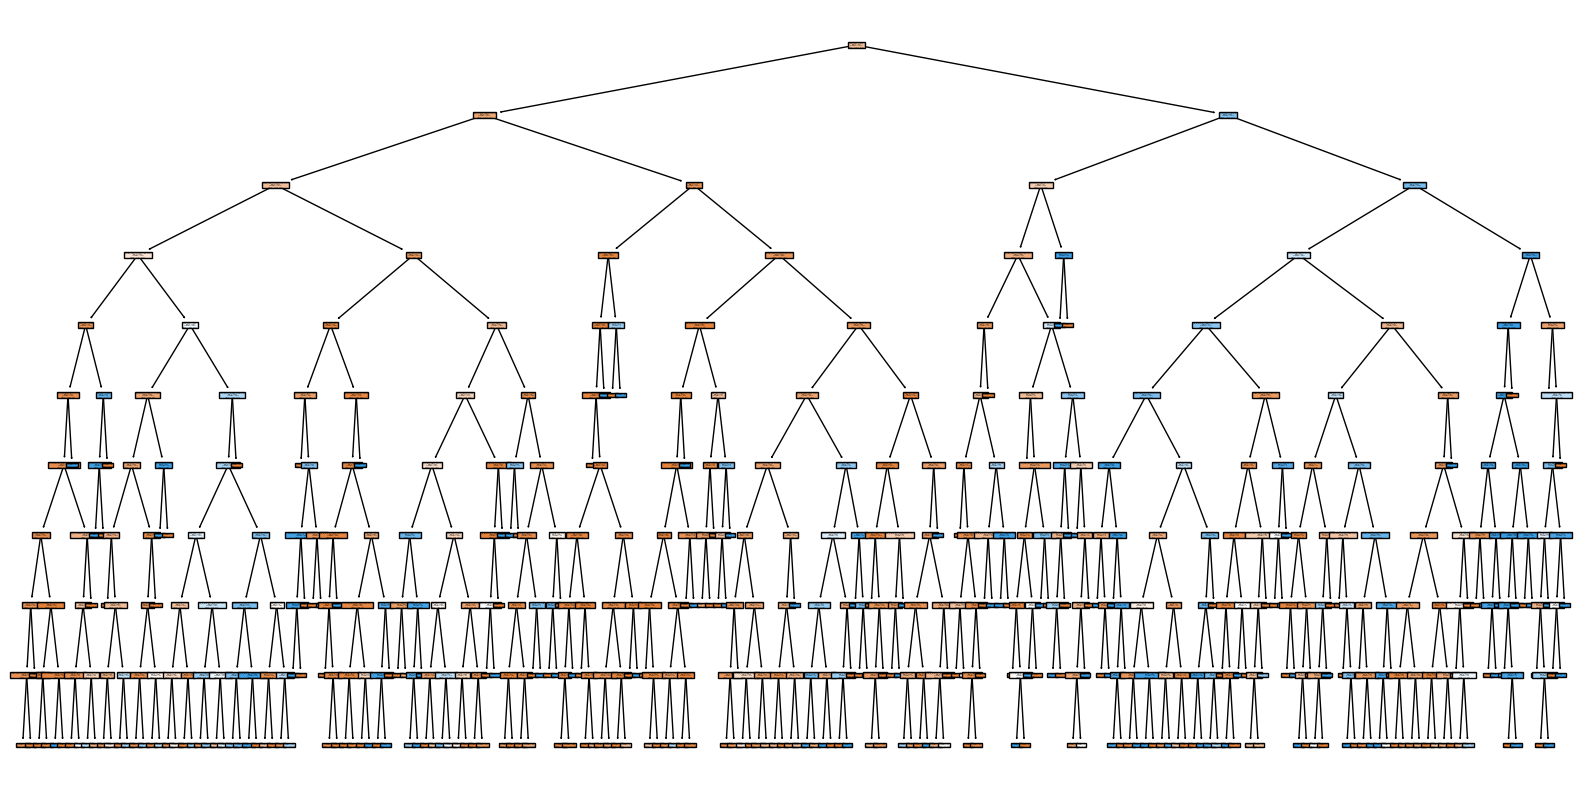

In [1742]:
# Create a large tree diagram that shows how the model makes decisions based on the input features.
plt.figure(figsize=[20,10])
plot_tree(Dt_gs.best_estimator_,filled=True,feature_names=X_train.columns)
plt.show()

### 4）Random Forest

- Default Parameters

In [1761]:
Rf = RandomForestClassifier().fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4878
           1       0.88      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



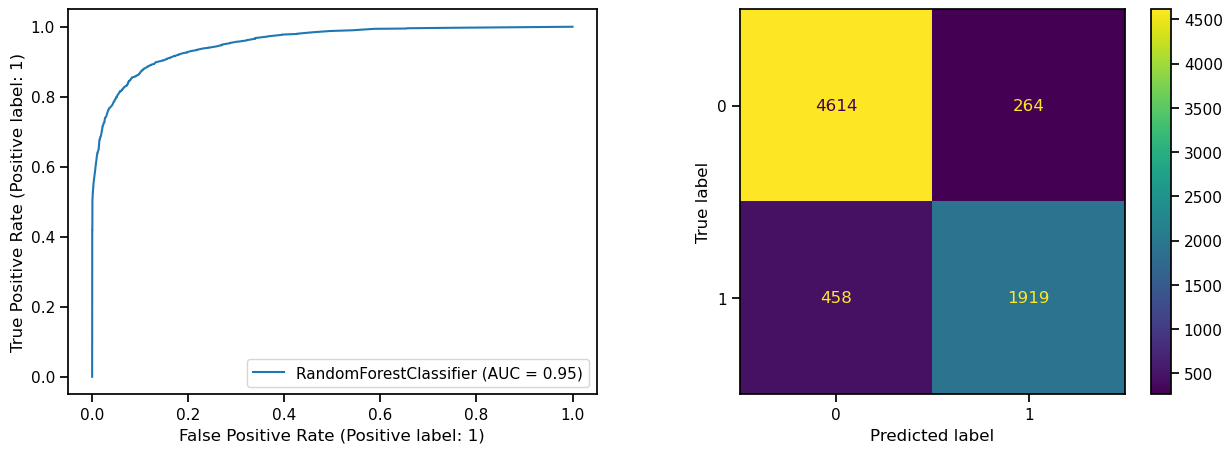

In [1762]:
evaluate(Rf,X_test,y_test)

- Parameters Search

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4878
           1       0.88      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



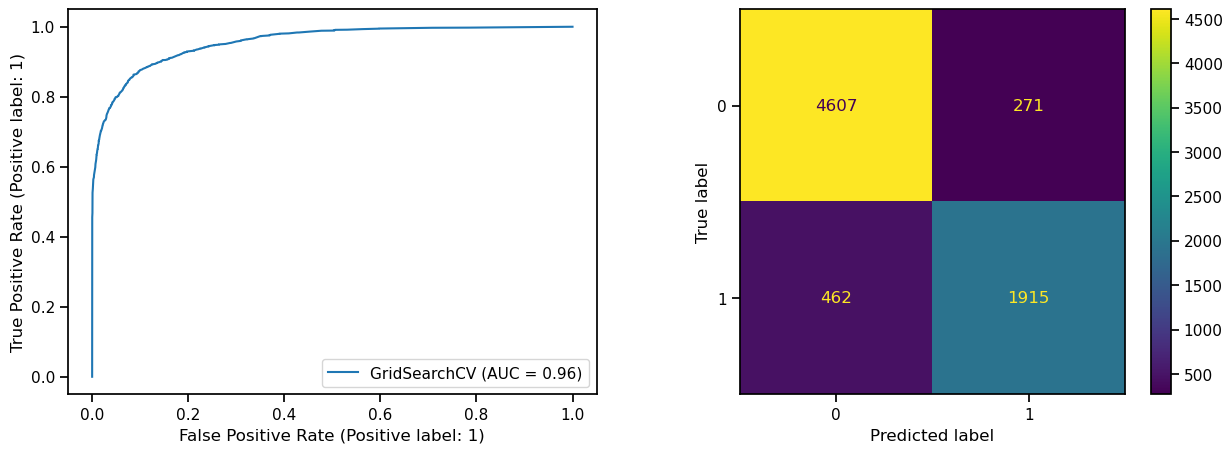

In [1745]:
# Automate way to search for the best hyperparameters
Rf_gs = GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':np.arange(50,200,50)})
Rf_gs.fit(X_train,y_train)
evaluate(Rf_gs,X_test,y_test)

We can see that the accuracy was unchanged, but auc improved by 1%

## Models Comparison

In [1759]:
score = pd.DataFrame({'Model':['Logistic regression','K Neighbors','Decision Tree','Random Forest'],
              'AUC':[0.86,0.90,0.93,0.96],
              'Accuracy':[0.80,0.85,0.88,0.90],
              'Weighted avg Precision':[0.80,0.85,0.87,0.90],
              'Weighted avg Recall':[0.80,0.85,0.87,0.90],
              'weighted avg F1':[0.80,0.85,0.87,0.90]})
score.sort_values(by='AUC',ascending=False)

,Model,AUC,Accuracy,Weighted avg Precision,Weighted avg Recall,weighted avg F1
3,Random Forest,0.96,0.90,0.90,0.90,0.90
2,Decision Tree,0.93,0.88,0.87,0.87,0.87
1,K Neighbors,0.90,0.85,0.85,0.85,0.85
0,Logistic regression,0.86,0.80,0.80,0.80,0.80


The Random Forest model 
- achieved the highest AUC score of 0.96, indicating that it has a high ability to distinguish between positive and negative classes.
- achieved the highest accuracy score of 0.90, indicating that it correctly classified 90% of instances.

Overall, the Random Forest model achieved the highest scores in both AUC and accuracy, indicating that it is the best model for this dataset.

## Error Analysis

In [1763]:
# Predicts the target variable for the test data using the four models that were previously defined and optimized using grid search
predicts = []
for model in [Lr_gs,Knn_gs,Dt_gs,Rf_gs]:
    yhat=model.predict(X_test)
    predicts.append(yhat)

In [1764]:
# Combines the predicted values generated by the four models into a single DataFrame
predicts = pd.DataFrame(np.vstack(predicts).T,columns=['Logistic regression','K Neighbors','Decision Tree','Random Forest'])
predicts['label'] = y_test.values
error = predicts.apply(lambda x:x.iloc[:-1]!=x.iloc[-1],axis=1)

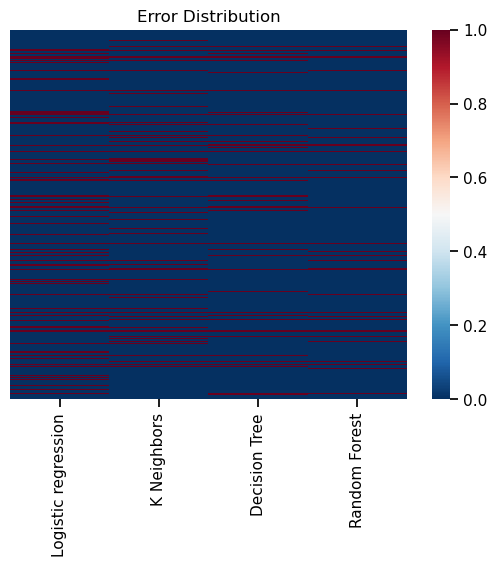

In [1765]:
# Creates a heatmap visualization of the error
fig,ax = plt.subplots()
sns.heatmap(error.astype(int),yticklabels=[],ax=ax,cmap='RdBu_r')
ax.set_title('Error Distribution')
plt.show()

In [1766]:
# Show examples where the model fails 
Lr_error = X_test.loc[(error['Logistic regression']==True).values]
Lr_error

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
20514,0,0,2,0,192,2018,6,24,0,0,...,0,0,0,0,0,0,0,0,1,0
32203,0,2,3,0,212,2018,5,20,0,0,...,0,0,0,0,0,0,0,0,1,0
25059,0,0,2,0,103,2018,4,19,0,0,...,0,0,0,0,0,0,0,0,1,0
5249,0,1,3,0,106,2018,11,21,0,0,...,0,0,0,0,0,0,0,0,0,1
19569,0,1,3,0,50,2018,9,8,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,0,1,2,0,81,2017,7,27,0,0,...,0,0,0,0,0,0,0,0,0,1
29306,0,1,1,0,0,2018,2,13,0,0,...,0,1,0,0,0,0,0,0,0,1
7287,0,2,1,0,92,2017,7,4,0,0,...,0,0,0,0,0,0,0,0,0,1
13295,0,2,4,0,52,2018,8,26,0,0,...,0,1,0,0,0,0,0,0,0,1


In [1767]:
# Show examples where the model fails 
Knn_error=X_test.loc[(error['K Neighbors']==True).values]
Knn_error

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
5249,0,1,3,0,106,2018,11,21,0,0,...,0,0,0,0,0,0,0,0,0,1
19569,0,1,3,0,50,2018,9,8,0,0,...,0,0,0,0,0,0,0,0,0,1
35867,0,0,2,0,39,2018,3,11,0,0,...,0,0,0,0,0,0,0,0,0,1
11247,0,0,1,0,3,2017,11,27,0,0,...,0,0,0,0,0,0,0,0,0,1
35851,0,1,3,0,8,2018,10,17,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35366,0,0,1,0,0,2018,5,24,0,0,...,0,0,0,0,0,0,0,0,0,1
2989,0,0,1,0,49,2018,3,17,0,0,...,0,0,0,0,0,0,0,0,0,1
21684,0,2,1,0,96,2017,7,11,0,0,...,0,0,0,0,0,0,0,0,1,0
17530,0,1,2,0,81,2017,7,27,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1768]:
# Show examples where the model fails 
Dt_error = X_test.loc[(error['Decision Tree']==True).values]
Dt_error

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
32203,0,2,3,0,212,2018,5,20,0,0,...,0,0,0,0,0,0,0,0,1,0
5249,0,1,3,0,106,2018,11,21,0,0,...,0,0,0,0,0,0,0,0,0,1
19569,0,1,3,0,50,2018,9,8,0,0,...,0,0,0,0,0,0,0,0,0,1
35867,0,0,2,0,39,2018,3,11,0,0,...,0,0,0,0,0,0,0,0,0,1
6545,2,2,3,0,67,2017,7,10,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,0,0,1,0,49,2018,3,17,0,0,...,0,0,0,0,0,0,0,0,0,1
29831,0,2,1,0,117,2017,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17530,0,1,2,0,81,2017,7,27,0,0,...,0,0,0,0,0,0,0,0,0,1
29306,0,1,1,0,0,2018,2,13,0,0,...,0,1,0,0,0,0,0,0,0,1


In [1769]:
# Show examples where the model fails 
Rf_error = X_test.loc[(error['Random Forest']==True).values]
Rf_error

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
32203,0,2,3,0,212,2018,5,20,0,0,...,0,0,0,0,0,0,0,0,1,0
5249,0,1,3,0,106,2018,11,21,0,0,...,0,0,0,0,0,0,0,0,0,1
19569,0,1,3,0,50,2018,9,8,0,0,...,0,0,0,0,0,0,0,0,0,1
35867,0,0,2,0,39,2018,3,11,0,0,...,0,0,0,0,0,0,0,0,0,1
11247,0,0,1,0,3,2017,11,27,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0,1,1,0,64,2018,8,8,0,0,...,0,1,0,0,0,0,0,0,0,1
2989,0,0,1,0,49,2018,3,17,0,0,...,0,0,0,0,0,0,0,0,0,1
21684,0,2,1,0,96,2017,7,11,0,0,...,0,0,0,0,0,0,0,0,1,0
2412,0,0,3,0,103,2018,5,4,0,0,...,0,0,0,0,0,0,0,0,0,1


Possible reasons for misprediction:
- Noise: Random noise in the data can have a negative impact on the model's performance.
- Bias: Bias refers to the model's deviation from the true relationship, usually due to the model being too simple or the assumptions being incorrect.
- Variance: Variance refers to the instability of the model's predictions on different datasets, usually due to the model being too complex or overfitting.
    * For example:  
    * Logistic regression models can overfit the training data if the model is too complex or the regularization parameter is set too low.
    * Trees can easily overfit the training data if the tree is too deep or if the stopping criterion is not set correctly. 
- Insufficient Features: If there are not enough features or the selected features are not relevant to the problem, the model's performance may also be affected.
- Imbalanced classes/data: it can lead to poor performance in rare classes.
    * For example: 
    * KNN can be sensitive to imbalanced classes because it relies on the majority class in the k nearest neighbors.
    * Random Forest can be biased toward the majority class in imbalanced datasets. 

To improve the performance of the model, the following methods can be used:
- Use more and better features to capture more patterns and relationships.
- Choose a model that is more suitable for the problem and avoid models that are either too simple or too complex.
- Use ensemble learning methods, such as gradient boosting trees, to improve the performance and robustness of the model.